In [29]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd 
%matplotlib inline

In [30]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score,train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.tree import plot_tree

In [31]:
df=pd.read_csv('../datasets/Obesity Classification.csv')

In [32]:
df.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese


In [33]:
classes=df['Label'].unique()


In [34]:
X=df.drop(columns=['ID','Label'])

In [35]:
Y=df['Label']

In [36]:
numerical_data=X.select_dtypes(['number']).columns
categorical_data=X.select_dtypes(['object']).columns

In [37]:
preprocess=ColumnTransformer(transformers=[('encode',OneHotEncoder(),categorical_data),('scale',StandardScaler(),numerical_data)])

In [38]:
pipe=Pipeline([('preprocess',preprocess),('model', RandomForestClassifier())])

In [39]:
xtr,xte,ytr,yte=train_test_split(X,Y,test_size=0.2,random_state=20)

In [40]:
pipe.fit(xtr,ytr)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('encode', OneHotEncoder(),
                                                  Index(['Gender'], dtype='object')),
                                                 ('scale', StandardScaler(),
                                                  Index(['Age', 'Height', 'Weight', 'BMI'], dtype='object'))])),
                ('model', RandomForestClassifier())])

In [41]:
yp=pipe.predict(xte)

In [42]:
accuracy_score(yp,yte)

1.0

In [43]:
confusion_matrix(yp,yte)

array([[5, 0, 0, 0],
       [0, 3, 0, 0],
       [0, 0, 6, 0],
       [0, 0, 0, 8]], dtype=int64)

In [44]:
print(classification_report(yp,yte))

               precision    recall  f1-score   support

Normal Weight       1.00      1.00      1.00         5
        Obese       1.00      1.00      1.00         3
   Overweight       1.00      1.00      1.00         6
  Underweight       1.00      1.00      1.00         8

     accuracy                           1.00        22
    macro avg       1.00      1.00      1.00        22
 weighted avg       1.00      1.00      1.00        22



[Text(0.3333333333333333, 0.9285714285714286, 'x[4] <= -0.182\ngini = 0.684\nsamples = 52\nvalue = [20.0, 12.0, 14.0, 40.0]\nclass = Obese'),
 Text(0.16666666666666666, 0.7857142857142857, 'gini = 0.0\nsamples = 26\nvalue = [0, 0, 0, 40]\nclass = Obese'),
 Text(0.25, 0.8571428571428572, 'True  '),
 Text(0.5, 0.7857142857142857, 'x[4] <= 1.419\ngini = 0.65\nsamples = 26\nvalue = [20, 12, 14, 0]\nclass = Normal Weight'),
 Text(0.41666666666666663, 0.8571428571428572, '  False'),
 Text(0.3333333333333333, 0.6428571428571429, 'x[4] <= 0.529\ngini = 0.484\nsamples = 21\nvalue = [20, 0, 14, 0]\nclass = Normal Weight'),
 Text(0.16666666666666666, 0.5, 'gini = 0.0\nsamples = 11\nvalue = [15, 0, 0, 0]\nclass = Normal Weight'),
 Text(0.5, 0.5, 'x[2] <= -0.41\ngini = 0.388\nsamples = 10\nvalue = [5, 0, 14, 0]\nclass = Underweight'),
 Text(0.3333333333333333, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [4, 0, 0, 0]\nclass = Normal Weight'),
 Text(0.6666666666666666, 0.35714285714285715,

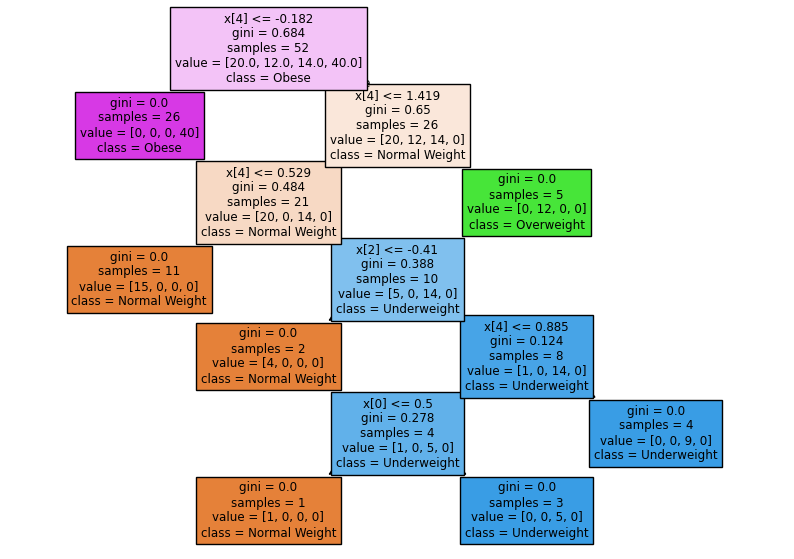

In [45]:
plt.figure(figsize=(10,7))
plot_tree(pipe['model'].estimators_[5],filled=True,class_names=classes)

In [46]:
Xtr_preprocess=pipe.named_steps['preprocess'].fit_transform(xtr)
Xte_preprocess=pipe.named_steps['preprocess'].transform(xte)

In [47]:
params={
    'n_estimators':list(range(100,500,100)),
    'max_features': ['sqrt', 'log2'],
    'criterion':['gini', 'entropy'],
    'max_depth':list(range(1,16,2)),
    'min_samples_split':list(range(1,5)),
    'bootstrap': [True, False]
}

In [48]:
cv=GridSearchCV(pipe['model'],param_grid=params,cv=5,scoring='accuracy',n_jobs=-1)

In [49]:
cv.fit(Xtr_preprocess,ytr)

c:\Users\RameshPatil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
1280 fits failed out of a total of 5120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1280 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\RameshPatil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\RameshPatil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\RameshPatil\AppData\Local\Programs\Python\Python312\Lib

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 3, 5, 7, 9, 11, 13, 15],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [1, 2, 3, 4],
                         'n_estimators': [100, 200, 300, 400]},
             scoring='accuracy')

In [50]:
print(cv.best_estimator_)

RandomForestClassifier(max_depth=3, min_samples_split=3)


In [51]:
print(cv.best_params_)

{'bootstrap': True, 'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_split': 3, 'n_estimators': 100}


In [52]:
best_model=cv.best_estimator_

In [53]:
yp_b=best_model.predict(Xte_preprocess)

In [54]:
accuracy_score(yp_b,yte)

0.9545454545454546

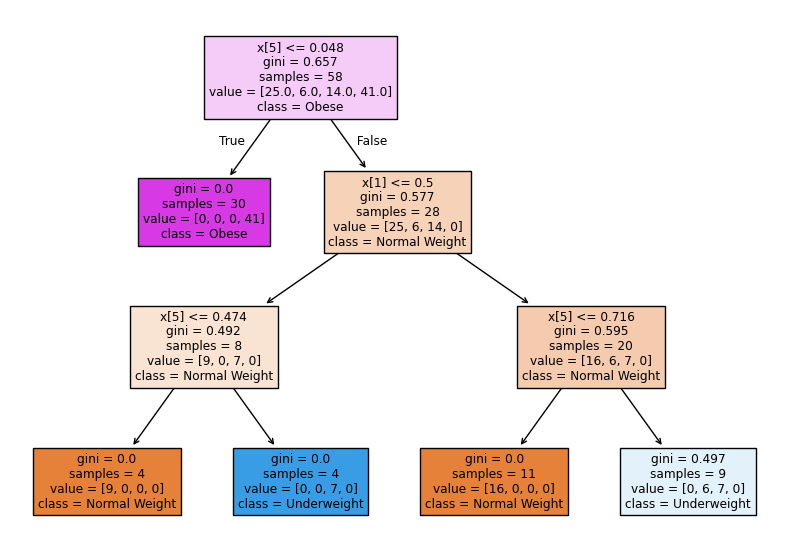

In [55]:
plt.figure(figsize=(10,7))
plot_tree(best_model.estimators_[5],filled=True,class_names=classes)
plt.show()

<Axes: >

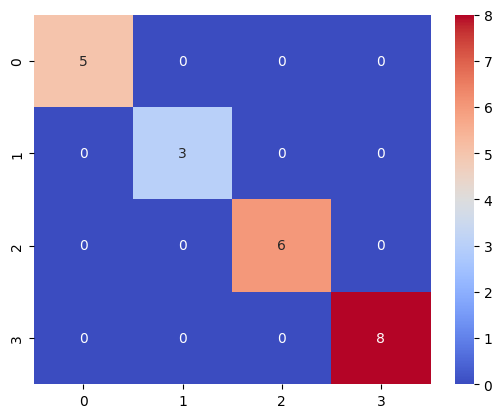

In [57]:
sns.heatmap(confusion_matrix(yp,yte),annot=True,cmap='coolwarm')